In [19]:
import thinkbayes2
import thinkplot


In [78]:
class Socks(thinkbayes2.Suite):
    
    def __init__(self, hypos):
        """Inits a Sock object.
        
        hypos: sequence or map of number of pairs in the drawer
        
        matched: number of matched socks that have been picked
        unmatched: number of unmatched socks that have been picked
        """
        thinkbayes2.Suite.__init__(self, hypos)
        self.matched = 0
        self.unmatched = 0
        
    def Update(self, data):
        """Updates the suite based on data.
        
        data: 'u' if we picked an unmatched sock, 'm' otherwise
        """
        thinkbayes2.Suite.Update(self, data)
        if data == 'u':
            self.unmatched += 1
        else:
            self.matched += 1
            
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: 'u' if we picked an unmatched sock, 'm' otherwise
        hypo: hypothetical number of pairs
        """
        n_pairs = hypo
        n_socks = 2 * n_pairs - self.matched - self.unmatched
        if n_socks <= 0:
            return 0
        
        n_singletons = self.unmatched - self.matched
        p = n_singletons / n_socks

        like = 1-p if data == 'u' else p
        return like

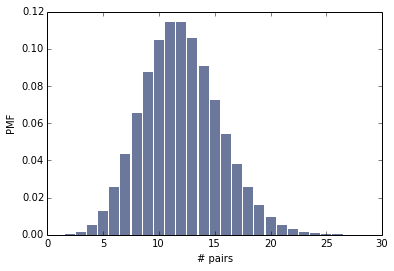

In [79]:
prior_n_pairs = thinkbayes2.MakePoissonPmf(12, 30)
suite = Socks(prior_n_pairs)
thinkplot.Hist(suite)
thinkplot.Config(xlabel='# pairs', ylabel='PMF', xlim=[0, 30])

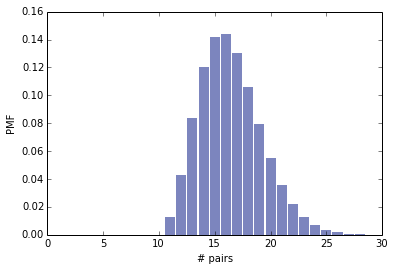

In [80]:
suite = Socks(hypos)
for datum in 'u' * 11:
    suite.Update('u')
thinkplot.Hist(suite)
thinkplot.Config(xlabel='# pairs', ylabel='PMF', xlim=[0, 30])

In [91]:
class Socks2(Socks, thinkbayes2.Joint):
    
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: 'u' if we picked an unmatched sock, 'm' otherwise
        hypo: hypothetical number of pairs, number of odds
        """
        n_pairs, n_odds = hypo
        n_socks = 2 * n_pairs + n_odds - self.matched - self.unmatched
        if n_socks <= 0:
            return 0
        
        n_singletons = self.unmatched - self.matched
        p = n_singletons / n_socks

        like = 1-p if data == 'u' else p
        return like

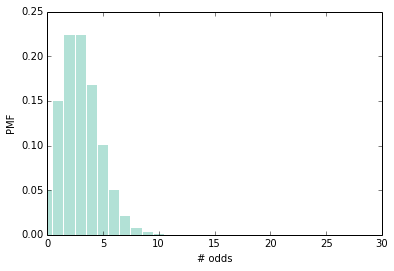

In [92]:
prior_n_odds = thinkbayes2.MakePoissonPmf(3, 30)
thinkplot.Hist(prior_n_odds)
thinkplot.Config(xlabel='# odds', ylabel='PMF', xlim=[0, 30])

In [93]:
joint = thinkbayes2.MakeJoint(prior_n_pairs, prior_n_odds)
suite = Socks2(joint)
for datum in 'u' * 11:
    suite.Update('u')

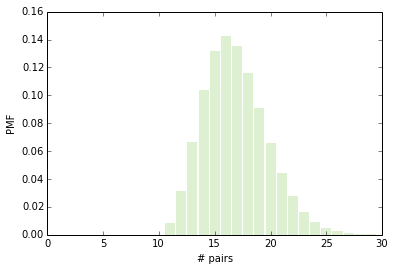

In [94]:
post_n_pairs = suite.Marginal(0)
thinkplot.Hist(post_n_pairs)
thinkplot.Config(xlabel='# pairs', ylabel='PMF', xlim=[0, 30])

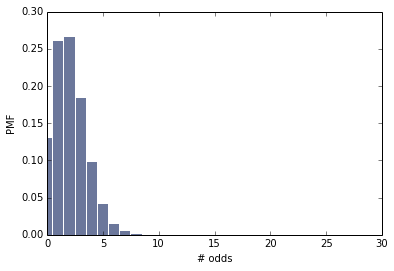

In [96]:
post_n_odds = suite.Marginal(1)
thinkplot.Hist(post_n_odds)
thinkplot.Config(xlabel='# odds', ylabel='PMF', xlim=[0, 30])